## 2024机器智能 实验二

In [1]:
# File: 2024机器智能实验02_teacher.ipynb
# License: MIT License 
# Copyright: (c) 2024 Rongxi Li <lirx67@mail2.sysu.edu.cn> 
# Created: 2024-02-27
# Brief: 2024机器智能实验课教师版——实验二

### 必要依赖

In [2]:
!pip install --upgrade ipympl
!pip install numpy 
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
%matplotlib ipympl

In [4]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from collections import defaultdict
import heapq
import pickle
from typing import List, Tuple, Dict

In [5]:
import base64
from IPython.display import Image, display


def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string + "?bgColor=FFFFFF"))

In [6]:
class PriorityQueue:
    def __init__(self):
        self._heap = []
        self._count = 0

    def put(self, item, priority):
        heapq.heappush(self._heap, (priority, self._count, item))
        self._count += 1

    def get(self):
        return heapq.heappop(self._heap)[2]

    def empty(self):
        return len(self._heap) == 0

    @property
    def data(self):
        return (i for _, _, i in self._heap)

### 2. 启发式搜索

#### 2.1 Dijkstra算法（先不做）
下图是有权图，其权重表示这两个节点之间的代价。请使用Dijkstra算法对下面有权图搜索任意两点的最优路径，并给出该路径的总代价。

* 算法输入输出要求：
  * 输入：图；起始点；终点。
  * 输出：路径；路径长度。

* 例：
  * 起始点D，终点J：(['D', 'A', 'B', 'F', 'K', 'J'], 15)

In [7]:
mm(
    """
graph TD
    A -- 5 --- B;
    A -- 3 --- C;
    A -- 2 --- D;
    B -- 8 --- C;
    B -- 4 --- E;
    B -- 1 --- F;
    C -- 9 --- G;
    D -- 7 --- H;
    D -- 12 --- I;
    E -- 5 --- J;
    F -- 14 --- J;
    F -- 3 --- K;
    F -- 1 --- L;
    G -- 2 --- H;
    G -- 1 --- L;
    G -- 1 --- M;
    I -- 4 --- M;
    J -- 4 --- K;
"""
)

In [8]:
# 2. 邻接表
class AdjacencyMapGraph:
    def __init__(self, edges: List[Tuple[str, str]], weight: List[float] = None):
        self.adjacency_map = defaultdict(list)
        self.weight_map = {}
        self.add_bi_edges(edges, weight)

    def add_bi_edges(self, edges: List[Tuple[str, str]], weight: List[float] = None):
        if weight is not None:
            assert len(edges) == len(weight)
        for i, edge in enumerate(edges):
            node1, node2 = edge
            if not self.adjacency_map.get(node1) or node2 not in self.adjacency_map.get(
                node1
            ):
                self.adjacency_map[node1].append(node2)
                self.adjacency_map[node2].append(node1)
                self.weight_map[(node1, node2)] = 1 if weight is None else weight[i]
                self.weight_map[(node2, node1)] = 1 if weight is None else weight[i]

    def get_neighbors(self, node):
        return self.adjacency_map[node]

    def get_cost(self, node1: str, node2: str):
        ret = self.weight_map.get((node1, node2))
        if ret is None:
            return float("inf")
        else:
            return ret

In [9]:
edges = [
    ("A", "B"),
    ("A", "C"),
    ("A", "D"),
    ("B", "C"),
    ("B", "E"),
    ("B", "F"),
    ("C", "G"),
    ("D", "H"),
    ("D", "I"),
    ("E", "J"),
    ("F", "J"),
    ("F", "K"),
    ("F", "L"),
    ("G", "H"),
    ("G", "L"),
    ("G", "M"),
    ("I", "M"),
    ("J", "K"),
]
costs = [5, 3, 2, 8, 4, 1, 9, 7, 12, 5, 14, 3, 1, 2, 1, 1, 4, 4]
graph = AdjacencyMapGraph(edges, costs)

**请在此完成Dijkstra算法**

提示：建议使用`PriorityQueue`完成。PriorityQueue 是一种数据结构，它允许存储具有优先级的元素，并根据优先级确定元素的顺序。

In [10]:
def dijkstra(graph, start: str, dest: str):
    # TODO
    return [], 0

In [11]:
print(dijkstra(graph, "D", "J"))

([], 0)


In [12]:
# 答案
def dijkstra(graph, start: str, dest: str):
    queue = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    queue.put(start, 0)
    cost_so_far[start] = 0

    while not queue.empty():
        current = queue.get()
        print("search:", current)
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            new_cost = cost_so_far[current] + graph.get_cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost
                queue.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return [], 0

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1], cost_so_far.get(dest)

In [13]:
print(dijkstra(graph, "D", "J"))

search: D
search: A
search: C
search: H
search: B
search: F
search: G
search: L
search: M
search: E
search: K
search: I
search: G
search: J
(['D', 'A', 'B', 'F', 'K', 'J'], 15)


#### 2.2 八数码问题（一）
请用启发式搜索算法求解以下八数码问题。

请尝试采用以下两种启发函数：
1. h(n)=0
2. h(n)=“不在位”的将牌数

参考答案

```
[((2, 8, 3), (1, 6, 4), (7, 0, 5)),
 ((2, 8, 3), (1, 0, 4), (7, 6, 5)),
 ((2, 0, 3), (1, 8, 4), (7, 6, 5)),
 ((0, 2, 3), (1, 8, 4), (7, 6, 5)),
 ((1, 2, 3), (0, 8, 4), (7, 6, 5)),
 ((1, 2, 3), (8, 0, 4), (7, 6, 5))]
```

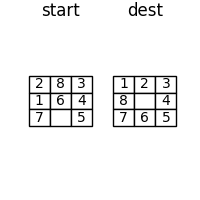

In [14]:
## 打印问题图片，不用看
data_begin = ((2, 8, 3), (1, 6, 4), (7, "", 5))
data_end = ((1, 2, 3), (8, "", 4), (7, 6, 5))
fig, ax = plt.subplots(1, 2, num="2.2", figsize=(2, 2))
table = ax[0].table(
    cellText=data_begin, loc="center", cellLoc="center", colWidths=[0.3, 0.3, 0.3]
)
ax[0].axis("off")
ax[0].set_title("start")
table = ax[1].table(
    cellText=data_end, loc="center", cellLoc="center", colWidths=[0.3, 0.3, 0.3]
)
ax[1].axis("off")
ax[1].set_title("dest")
plt.show()

**打印八数码图**

不用看

In [15]:
def PlotEightDigit(data: Tuple[Tuple[int]], num="EightDigit"):
    fig, ax = plt.subplots(num=num, figsize=(1, 1))
    table = ax.table(
        cellText=data, loc="center", cellLoc="center", colWidths=[0.3, 0.3, 0.3]
    )
    ax.axis("off")

In [16]:
start = ((2, 8, 3), (1, 6, 4), (7, 0, 5))
# 请参照start填写dest内容
dest = ()

In [17]:
# 答案
start = ((2, 8, 3), (1, 6, 4), (7, 0, 5))
dest = ((1, 2, 3), (8, 0, 4), (7, 6, 5))

**启发函数的实现**

In [18]:
def heuristic_none(data: Tuple[Tuple[int]], dest: Tuple[Tuple[int]]):
    return 0

In [19]:
## 答案
def heuristic_diff(data: Tuple[Tuple[int]], dest: Tuple[Tuple[int]]):
    ret = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] != dest[i][j]:
                ret += 1
    return ret


def heuristic_dist(data: Tuple[Tuple[int]], dest: Tuple[Tuple[int]]):
    data_loc_map = {}
    dest_loc_map = {}
    ret = 0

    for i in range(len(data)):
        for j in range(len(data[0])):
            data_loc_map[data[i][j]] = (i, j)
    for i in range(len(dest)):
        for j in range(len(dest[0])):
            dest_loc_map[dest[i][j]] = (i, j)

    for k in data_loc_map:
        ret += sum([abs(a - b) for a, b in zip(data_loc_map[k], dest_loc_map[k])])
    return ret

**获取邻居**

In [20]:
## 获取当前八数码所有可能的行动
def get_neighbors(data: Tuple[Tuple[int]]):
    # 此为返回值
    ret = []
    ## 找到0所在位置

    ## 判断该位置四个邻居是否合法（在框内）
    ## 若在，构造新的八数码图并添加到返回值中

    return ret

In [21]:
## 答案
def get_exchange(data, p1, p2):
    def get_data(x, y):
        if x == p1[0] and y == p1[1]:
            return data[p2[0]][p2[1]]
        elif x == p2[0] and y == p2[1]:
            return data[p1[0]][p1[1]]
        else:
            return data[x][y]

    ret = tuple(
        tuple((get_data(i, j) for j in range(len(data[0])))) for i in range(len(data))
    )
    return ret


def get_neighbors(data: Tuple[Tuple[int]]):
    ret = []
    ## 找到0所在位置
    zx, zy = None, None
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] == 0:
                zx, zy = i, j
                break
    if zx is None:
        raise RuntimeError("Something went wrong.")
    ## 判断该位置四个邻居是否合法（在框内）
    ## 若在，构造新的八数码图并添加到返回值中
    neighbors = [(zx + 1, zy), (zx - 1, zy), (zx, zy - 1), (zx, zy + 1)]
    for nx, ny in neighbors:
        if nx >= 0 and nx < 3 and ny >= 0 and ny < 3:
            ret.append(get_exchange(data, (zx, zy), (nx, ny)))
    return ret

**PriorityQueue介绍**

PriorityQueue是由堆实现的，它具有能够按顺序将插入的数据弹出。

其输入第一个参数为数据，第二个参数为优先级。

In [22]:
pq_demo = PriorityQueue()
pq_demo.put("data5", 5)
pq_demo.put("data9", 9)
pq_demo.put("data2", 2)
pq_demo.put("data7", 7)

print(pq_demo.get())
print(pq_demo.get())
print(pq_demo.get())

data2
data5
data7


**启发式搜索实现**

In [23]:
def search(start, dest, heuristic):
    ## 定义数据
    open_list = PriorityQueue()
    # ...

    ## 开始搜索
    while not open_list.empty():
        # do something
        pass
    ## 回溯路径

    ## 返回路径
    return []

In [24]:
## 答案
def search(start, dest, heuristic):
    open_list = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    open_list.put(start, 0)
    cost_so_far[start] = 0

    while not open_list.empty():
        current = open_list.get()

        if current == dest:
            break
        for next in get_neighbors(current):
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost + heuristic(next, dest)
                open_list.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return []

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1]

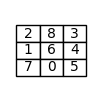

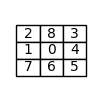

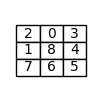

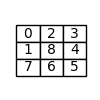

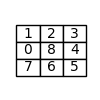

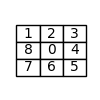

In [25]:
ret = search(start, dest, heuristic_none)
for i, r in enumerate(ret):
    ## 第二个参数为图像标题，请保证每一题标题不一致，否则冲突会有意想不到的结果
    PlotEightDigit(r, f"fig{i}")

In [26]:
## 答案
search(start, dest, heuristic_diff)

[((2, 8, 3), (1, 6, 4), (7, 0, 5)),
 ((2, 8, 3), (1, 0, 4), (7, 6, 5)),
 ((2, 0, 3), (1, 8, 4), (7, 6, 5)),
 ((0, 2, 3), (1, 8, 4), (7, 6, 5)),
 ((1, 2, 3), (0, 8, 4), (7, 6, 5)),
 ((1, 2, 3), (8, 0, 4), (7, 6, 5))]

#### 2.3 八数码问题（二）
请用启发式搜索算法求解以下八数码问题。

请尝试采用以下两种启发函数：
1. h(n)=“不在位”的将牌数
2. h(n)=将牌“不在位”的距离和

参考答案：

```
[((6, 0, 3), (1, 4, 7), (8, 5, 2)),
 ((0, 6, 3), (1, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (0, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 0, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 0), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 2), (8, 5, 0)),
 ((1, 6, 3), (4, 7, 2), (8, 0, 5)),
 ((1, 6, 3), (4, 0, 2), (8, 7, 5)),
 ((1, 6, 3), (0, 4, 2), (8, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (0, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 0, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 5, 0)),
 ((1, 6, 3), (8, 4, 0), (7, 5, 2)),
 ((1, 6, 3), (8, 0, 4), (7, 5, 2)),
 ((1, 0, 3), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 0), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 0), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 2), (7, 5, 0)),
 ((1, 3, 4), (8, 6, 2), (7, 0, 5)),
 ((1, 3, 4), (8, 0, 2), (7, 6, 5)),
 ((1, 3, 4), (8, 2, 0), (7, 6, 5)),
 ((1, 3, 0), (8, 2, 4), (7, 6, 5)),
 ((1, 0, 3), (8, 2, 4), (7, 6, 5)),
 ((1, 2, 3), (8, 0, 4), (7, 6, 5))]
```

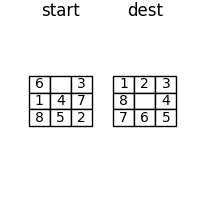

In [27]:
data_begin = ((6, "", 3), (1, 4, 7), (8, 5, 2))
data_end = ((1, 2, 3), (8, "", 4), (7, 6, 5))
fig, ax = plt.subplots(1, 2, num="2.3", figsize=(2, 2))
table = ax[0].table(
    cellText=data_begin, loc="center", cellLoc="center", colWidths=[0.3, 0.3, 0.3]
)
ax[0].axis("off")
ax[0].set_title("start")
table = ax[1].table(
    cellText=data_end, loc="center", cellLoc="center", colWidths=[0.3, 0.3, 0.3]
)
ax[1].axis("off")
ax[1].set_title("dest")
plt.show()

In [28]:
## 答案
start = ((6, 0, 3), (1, 4, 7), (8, 5, 2))
drst = ((1, 2, 3), (8, 0, 4), (7, 6, 5))

In [29]:
## 答案
search(start, dest, heuristic_diff)

[((6, 0, 3), (1, 4, 7), (8, 5, 2)),
 ((0, 6, 3), (1, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (0, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 0, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 0), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 2), (8, 5, 0)),
 ((1, 6, 3), (4, 7, 2), (8, 0, 5)),
 ((1, 6, 3), (4, 0, 2), (8, 7, 5)),
 ((1, 6, 3), (0, 4, 2), (8, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (0, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 0, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 5, 0)),
 ((1, 6, 3), (8, 4, 0), (7, 5, 2)),
 ((1, 6, 3), (8, 0, 4), (7, 5, 2)),
 ((1, 0, 3), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 0), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 0), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 2), (7, 5, 0)),
 ((1, 3, 4), (8, 6, 2), (7, 0, 5)),
 ((1, 3, 4), (8, 0, 2), (7, 6, 5)),
 ((1, 3, 4), (8, 2, 0), (7, 6, 5)),
 ((1, 3, 0), (8, 2, 4), (7, 6, 5)),
 ((1, 0, 3), (8, 2, 4), (7, 6, 5)),
 ((1, 2, 3), (8, 0, 4), (7, 6, 5))]

In [30]:
## 答案
search(start, dest, heuristic_dist)

[((6, 0, 3), (1, 4, 7), (8, 5, 2)),
 ((0, 6, 3), (1, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (0, 4, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 0, 7), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 0), (8, 5, 2)),
 ((1, 6, 3), (4, 7, 2), (8, 5, 0)),
 ((1, 6, 3), (4, 7, 2), (8, 0, 5)),
 ((1, 6, 3), (4, 0, 2), (8, 7, 5)),
 ((1, 6, 3), (0, 4, 2), (8, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (0, 7, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 0, 5)),
 ((1, 6, 3), (8, 4, 2), (7, 5, 0)),
 ((1, 6, 3), (8, 4, 0), (7, 5, 2)),
 ((1, 6, 3), (8, 0, 4), (7, 5, 2)),
 ((1, 0, 3), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 0), (8, 6, 4), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 0), (7, 5, 2)),
 ((1, 3, 4), (8, 6, 2), (7, 5, 0)),
 ((1, 3, 4), (8, 6, 2), (7, 0, 5)),
 ((1, 3, 4), (8, 0, 2), (7, 6, 5)),
 ((1, 3, 4), (8, 2, 0), (7, 6, 5)),
 ((1, 3, 0), (8, 2, 4), (7, 6, 5)),
 ((1, 0, 3), (8, 2, 4), (7, 6, 5)),
 ((1, 2, 3), (8, 0, 4), (7, 6, 5))]

#### 2.4 栅格地图路径规划
请通过编程实现针对栅格地图的广度优先搜索算法、深度优先搜索算法、Dijkstra算法以及A\*算法。

* 算法输入输出要求：
  * 输入：图
  * 输出：路径


**栅格地图的表示**

要求会用，不强制要求理解。

In [7]:
class RasterMap:
    def __init__(self, map_size: Tuple[int, int]):
        assert map_size[0] > 0 and map_size[1] > 0
        self.__map_size = map_size
        self.__obstacle: Dict[Tuple[int, int], bool] = {}
        self.__start: Tuple[int, int] = (0, 0)
        self.__dest: Tuple[int, int] = (map_size[0] - 1, map_size[1] - 1)

    @property
    def size(self):
        return self.__map_size

    @size.setter
    def size(self, size: Tuple[int, int]):
        assert size[0] > 0 and size[1] > 0
        self.__map_size = size

    @property
    def start(self):
        return self.__start

    @start.setter
    def start(self, start: Tuple[int, int]):
        assert self.in_bounds(start)
        self.__start = start

    @property
    def dest(self):
        return self.__dest

    @dest.setter
    def dest(self, dest: Tuple[int, int]):
        assert self.in_bounds(dest)
        self.__dest = dest

    @property
    def obstacle(self):
        return self.__obstacle

    def in_bounds(self, id: Tuple[int, int]) -> bool:
        return 0 <= id[0] < self.size[0] and 0 <= id[1] < self.size[1]

    def is_obstacle(self, id: Tuple[int, int]) -> bool:
        return id in self.obstacle

    def set_obstacle(self, id: Tuple[int, int], is_obstacle: bool):
        assert self.in_bounds(id)
        if is_obstacle:
            self.obstacle[id] = True
        else:
            del self.obstacle[id]

    def get_neighbors(self, id: Tuple[int, int]) -> List[Tuple[int, int]]:
        (x, y) = id
        neighbors = [(x + 1, y), (x - 1, y), (x, y - 1), (x, y + 1)]  # E W N S
        if (x + y) % 2 == 0:
            neighbors.reverse()  # S N W E
        results = filter(self.in_bounds, neighbors)
        results = filter(lambda x: not self.is_obstacle(x), results)
        return list(results)

    def save(self, path):
        with open(path, "wb") as f:
            pickle.dump(self, f)

    def load(self, path):
        with open(path, "rb") as f:
            data = pickle.load(f)
            self.size = data.size
            self.__obstacle = data.obstacle
            self.start = data.start
            self.dest = data.dest

In [8]:
# 构建长宽分别为40、20的栅格地图
map_example = RasterMap((40, 20))
# 获取坐标为(3,4)的邻居
print(map_example.get_neighbors((3, 4)))
# 设置与获取起点
map_example.start = (0, 1)
print(map_example.start)
# 设置与获取终点
map_example.dest = (5, 6)
print(map_example.dest)
# 保存与载入地图
# map_example.save("xxx.data")
# map_example.load("xxx.data")

[(4, 4), (2, 4), (3, 3), (3, 5)]
(0, 1)
(5, 6)


**栅格地图可视化**

不用看系列。

In [9]:
class PlotMap:
    def __init__(self, raster_map: RasterMap, planner=None):
        self.raster_map = raster_map
        self.planner = planner
        self.closed_list: List[Tuple[int, int]] = []
        self.open_list: List[Tuple[int, int]] = []
        self.path: List[Tuple[int, int]] = []
        self.set_mode = "O"
        self.processing_time = 0

        self.fig, self.ax = plt.subplots(
            num=f"Map {self.planner.__name__}" if self.planner else "Map"
        )
        self.btn = mpl.widgets.Button(plt.axes([0.1, 0.1, 0.05, 0.05]), "O")
        self.cid = self.fig.canvas.mpl_connect("button_press_event", self._click_cb)
        self.btn.on_clicked(self._btn_cb)
        self.text = self.ax.text(0, -0.75, "", fontsize=8, ha="left", va="bottom")

        self._update_path()
        self.show()

    def _btn_cb(self, event):
        if self.set_mode == "O":
            self.set_mode = "S"
            self.btn.label.set_text("S")
        elif self.set_mode == "S":
            self.set_mode = "D"
            self.btn.label.set_text("D")
        elif self.set_mode == "D":
            self.set_mode = "O"
            self.btn.label.set_text("O")

    def _update_data(self):
        self.plot_data = np.ones(self.raster_map.size) * 8
        for x, y in self.closed_list:
            self.plot_data[x, y] = 10
        for x, y in self.open_list:
            self.plot_data[x, y] = 0
        for x, y in self.path:
            self.plot_data[x, y] = 4
        self.plot_data[self.raster_map.start[0], self.raster_map.start[1]] = 7
        self.plot_data[self.raster_map.dest[0], self.raster_map.dest[1]] = 9
        for x, y in self.raster_map.obstacle:
            self.plot_data[x, y] = 5

    def _update_path(self):
        self.processing_time = 0
        if self.planner is not None:
            self.closed_list = []
            self.open_list = []
            self.path = []
            begin_time = time.time()
            ret = self.planner(self.raster_map)
            self.processing_time = time.time() - begin_time
            if isinstance(ret, list):
                self.path = ret
                self._update_data()
                self._show()
            elif isinstance(ret, tuple) and len(ret) == 3:
                self.path, self.closed_list, self.open_list = ret
                self._update_data()
                self._show()
            else:
                raise NotImplementedError()

        else:
            self._update_data()
            self._show()

    def _click_cb(self, event):
        if event.inaxes is self.ax.axes:
            col = int(event.xdata + 0.5)
            row = int(event.ydata + 0.5)
            if self.raster_map.in_bounds((col, row)):
                if self.set_mode == "O":
                    obs = self.raster_map.is_obstacle((col, row))
                    self.raster_map.set_obstacle((col, row), not obs)
                elif self.set_mode == "S":
                    self.raster_map.start = (col, row)
                elif self.set_mode == "D":
                    self.raster_map.dest = (col, row)

                self._update_path()

    def _show(self):
        self.ax.set_xticks(np.arange(-0.5, self.raster_map.size[0] + 0.5, 1))
        self.ax.set_yticks(np.arange(-0.5, self.raster_map.size[1] + 0.5, 1))
        self.ax.axes.xaxis.set_ticklabels([])
        self.ax.axes.yaxis.set_ticklabels([])
        self.ax.grid(True, color="white", linewidth=1.5)
        if len(self.path):
            self.text.set_text(f"path legth: {len(self.path)}")
        self.ax.imshow(self.plot_data.T, cmap="Set3", vmin=0, vmax=11)

    def show(self):
        plt.show()

    def show_animation(self):
        self.ani_fig, self.ani_ax = plt.subplots(
            num=f"Animation {self.planner.__name__}" if self.planner else "Animation"
        )
        self.ani_ax.cla()

        matrix = np.ones(self.raster_map.size) * 8

        def update(frame):
            idx = frame % (len(self.closed_list) + 1)
            if idx == len(self.closed_list):
                for x, y in self.closed_list:
                    matrix[x, y] = 10
                for x, y in self.path:
                    matrix[x, y] = 4
                matrix[self.raster_map.start[0], self.raster_map.start[1]] = 7
                matrix[self.raster_map.dest[0], self.raster_map.dest[1]] = 9
                for x, y in self.raster_map.obstacle:
                    matrix[x, y] = 5
            else:
                for x, y in self.closed_list[:idx]:
                    matrix[x, y] = 10
                expl_x, expl_y = self.closed_list[idx]
                matrix[expl_x, expl_y] = 0
                matrix[self.raster_map.start[0], self.raster_map.start[1]] = 7
                matrix[self.raster_map.dest[0], self.raster_map.dest[1]] = 9
                for x, y in self.raster_map.obstacle:
                    matrix[x, y] = 5

            self.ani_ax.cla()
            self.ani_ax.set_xticks(np.arange(-0.5, self.raster_map.size[0] + 0.5, 1))
            self.ani_ax.set_yticks(np.arange(-0.5, self.raster_map.size[1] + 0.5, 1))
            self.ani_ax.xaxis.set_ticklabels([])
            self.ani_ax.yaxis.set_ticklabels([])
            self.ani_ax.grid(True, color="white", linewidth=1.5)
            self.ani_ax.imshow(matrix.T, cmap="Set3", vmin=0, vmax=11)

        self.ani = animation.FuncAnimation(
            self.ani_fig,
            update,
            frames=len(self.closed_list) + 1,
            interval=1,
            repeat=False,
        )
        plt.show()

In [10]:
# 计算L2距离
def l2_distance(x, y):
    squared_diff = [(a - b) ** 2 for a, b in zip(x, y)]
    return math.sqrt(sum(squared_diff))


# 计算L1距离
def l1_distance(x, y):
    abs_diff = [abs(a - b) for a, b in zip(x, y)]
    return sum(abs_diff)

**请在此实现广度优先搜索算法、深度优先搜索算法、Dijkstra算法以及A\*算法（如时间不足优先完成A\*算法）**

In [11]:
def bfs(graph: RasterMap):
    return []


def dfs(graph: RasterMap):
    return []


def dijkstra(graph: RasterMap):
    return []


def a_star(graph: RasterMap):
    return []

In [12]:
# 答案
def bfs(graph):
    start = graph.start
    dest = graph.dest
    queue = [start]
    reached: Dict[Tuple[int, int], bool] = {start: True}
    came_from: Dict[Tuple[int, int], Tuple[int, int]] = {}
    path = []

    while len(queue):
        current = queue.pop(0)
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            if next not in reached:
                queue.append(next)
                reached[next] = True
                came_from[next] = current

    if not reached.get(dest):
        return []

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1]


def dfs(graph):
    start = graph.start
    dest = graph.dest
    reached: Dict[str, bool] = {start: True}

    def _dfs(graph, start: str, dest: str):
        neighbors = [n for n in graph.get_neighbors(start) if n not in reached]
        if dest in neighbors:
            return [dest, start]
        else:
            for current in neighbors:
                reached[current] = True
                path = _dfs(graph, current, dest)
                if len(path):
                    path.append(start)
                    return path
            return []

    path = _dfs(graph, start, dest)
    return path[::-1]


def dijkstra(graph):
    start = graph.start
    dest = graph.dest
    queue = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    queue.put(start, 0)
    cost_so_far[start] = 0

    while not queue.empty():
        current = queue.get()
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            new_cost = cost_so_far[current] + l1_distance(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost
                queue.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return []

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1]


def a_star(graph):
    start = graph.start
    dest = graph.dest
    queue = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    queue.put(start, 0)
    cost_so_far[start] = 0

    def heuristic(location):
        return l1_distance(location, dest)

    while not queue.empty():
        current = queue.get()
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            new_cost = cost_so_far[current] + l1_distance(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost + heuristic(next)
                queue.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return []

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1]

In [13]:
map = RasterMap((20, 20))
map.load("map1.data")

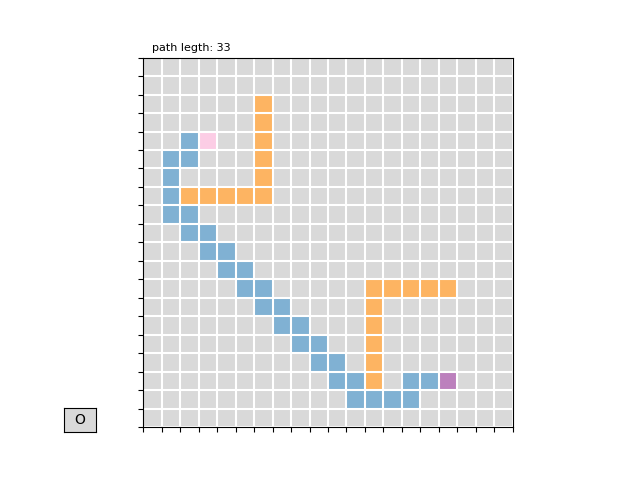

In [14]:
plot = PlotMap(map, bfs)

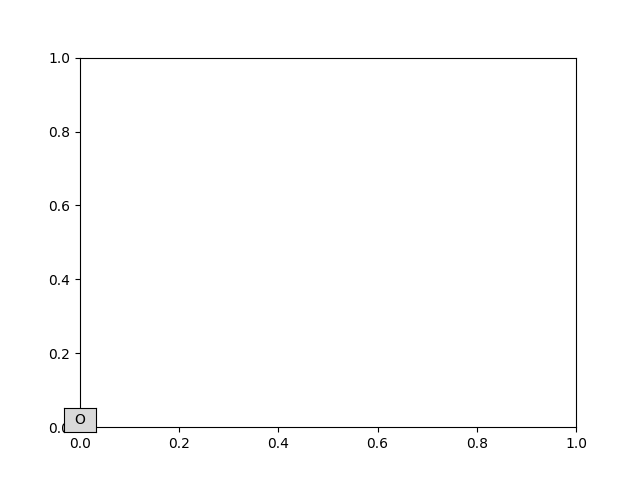

In [39]:
plot = PlotMap(map, dfs)

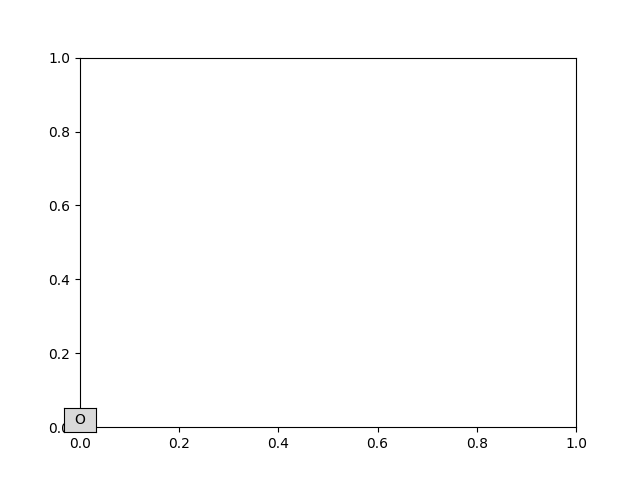

In [40]:
plot = PlotMap(map, dijkstra)

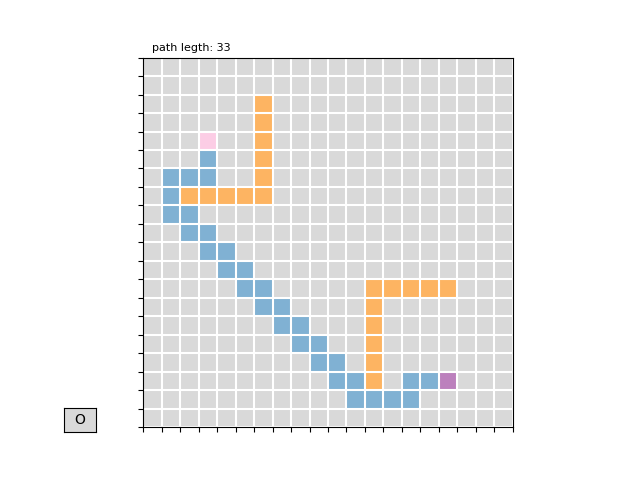

In [15]:
plot = PlotMap(map, a_star)

#### 2.3 算法比较
请将上述四种搜索算法的**已搜索区域**、**待搜索区域**可视化，更进一步可将上述搜索算法的搜索过程动态展示。举例说明这四种算法的特点，各自在什么场景中适用，并完成四种算法在不同场景中的性能比较。

提示：在栅格地图场景中，bfs和Dijsktra算法性能有什么差异？为什么？

In [16]:
# 答案
def bfs_pro(graph):
    start = graph.start
    dest = graph.dest
    queue = [start]
    reached: Dict[Tuple[int, int], bool] = {start: True}
    came_from: Dict[Tuple[int, int], Tuple[int, int]] = {}
    closed_list: List[Tuple[int, int]] = []
    path = []

    while len(queue):
        current = queue.pop(0)
        if current == dest:
            break
        closed_list.append(current)
        for next in graph.get_neighbors(current):
            if next not in reached:
                queue.append(next)
                reached[next] = True
                came_from[next] = current

    if not reached.get(dest):
        return [], closed_list, queue[:]

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1], closed_list, queue[:]


def dfs_pro(graph):
    start = graph.start
    dest = graph.dest
    reached: Dict[str, bool] = {start: True}
    closed_list: List[Tuple[int, int]] = []
    open_list: List[Tuple[int, int]] = []

    def _dfs(graph, start, dest):
        neighbors = [n for n in graph.get_neighbors(start) if n not in reached]
        if dest in neighbors:
            return [dest, start]
        else:
            closed_list.append(start)
            open_list.extend(neighbors)
            for current in neighbors:
                reached[current] = True
                path = _dfs(graph, current, dest)
                if len(path):
                    path.append(start)
                    return path
            return []

    path = _dfs(graph, start, dest)
    return path[::-1], closed_list, open_list


def dijkstra_pro(graph):
    start = graph.start
    dest = graph.dest
    queue = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    queue.put(start, 0)
    cost_so_far[start] = 0

    while not queue.empty():
        current = queue.get()
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            new_cost = cost_so_far[current] + l1_distance(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost
                queue.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return [], list(cost_so_far.keys()), list(queue.data)

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1], list(cost_so_far.keys()), list(queue.data)


def a_star_pro(graph):
    start = graph.start
    dest = graph.dest
    queue = PriorityQueue()
    cost_so_far: Dict[str, float] = {}
    came_from: Dict[str, str] = {}
    path = []
    queue.put(start, 0)
    cost_so_far[start] = 0

    def heuristic(location):
        return l1_distance(location, dest)

    while not queue.empty():
        current = queue.get()
        if current == dest:
            break
        for next in graph.get_neighbors(current):
            new_cost = cost_so_far[current] + l1_distance(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                priority = new_cost + heuristic(next)
                queue.put(next, priority)
                cost_so_far[next] = new_cost
                came_from[next] = current

    if not cost_so_far.get(dest):
        return [], list(cost_so_far.keys()), list(queue.data)

    path = [dest]
    current = came_from.get(dest)
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1], list(cost_so_far.keys()), list(queue.data)

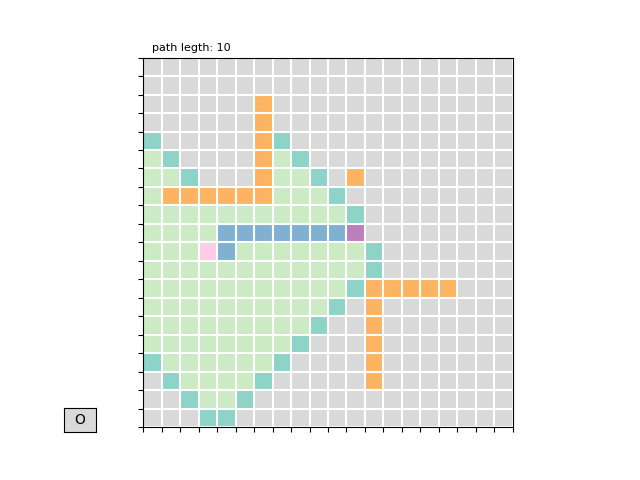

In [17]:
plot = PlotMap(map, bfs_pro)

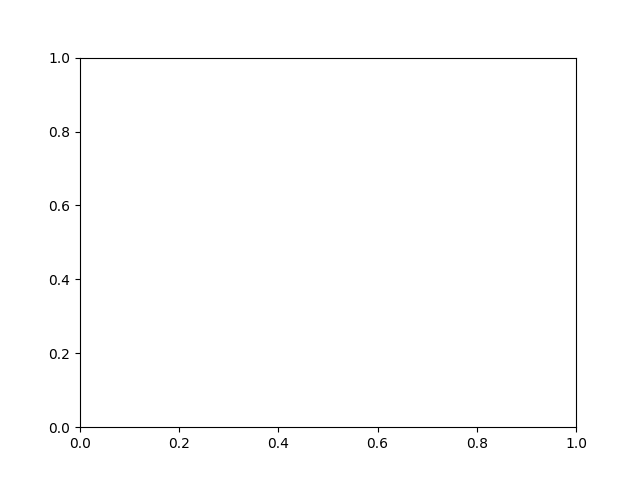

In [26]:
plot.show_animation()

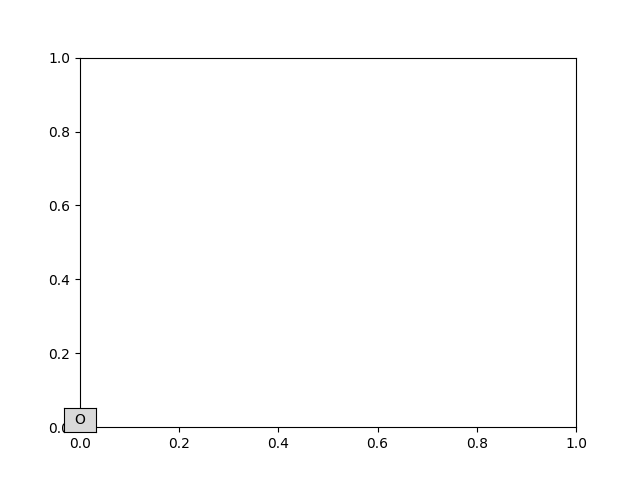

In [44]:
plot = PlotMap(map, dfs_pro)

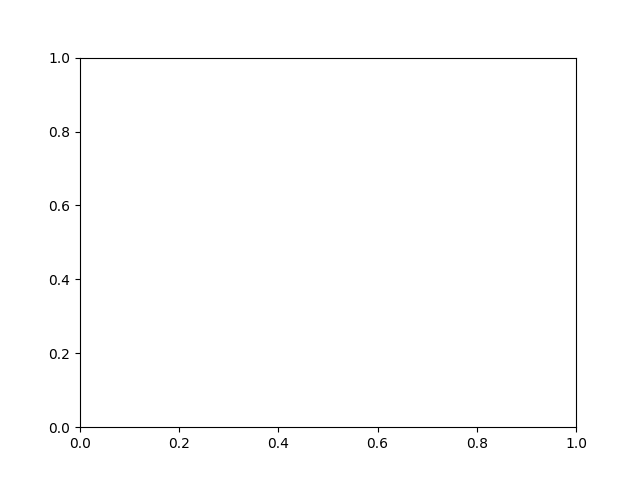

In [45]:
plot.show_animation()

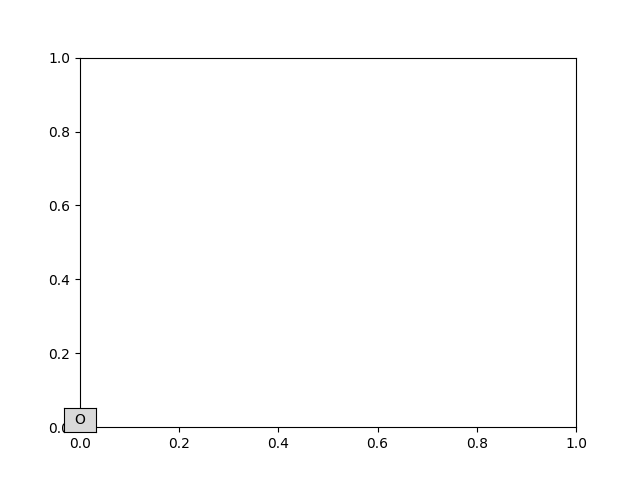

In [46]:
plot = PlotMap(map, dijkstra_pro)

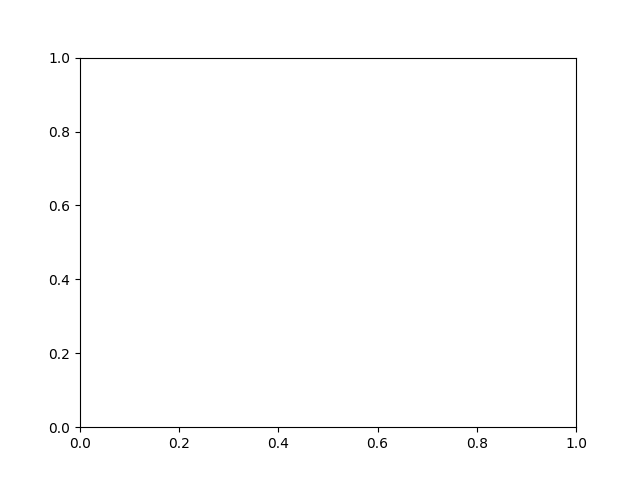

In [47]:
plot.show_animation()

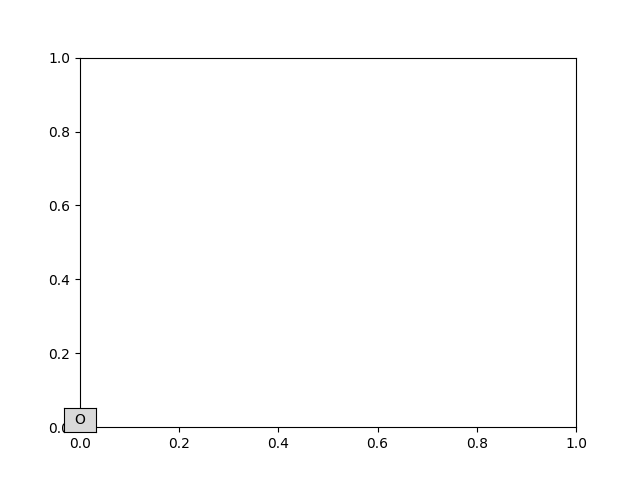

In [48]:
plot = PlotMap(map, a_star_pro)

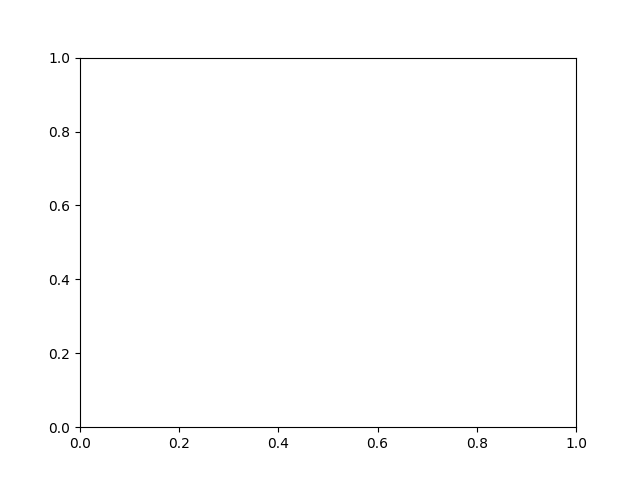

In [49]:
plot.show_animation()